<a href="https://colab.research.google.com/github/flaviarbatista/Assignments/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10: Customer Review Sentiment Analysis**
### **Name:** Flavia Batista
### **Course:** Data Analytics and Business Intelligence Analyst
### **Institution:** Willis Collegess Intelligence Analyst

#**Product: Amazon Alexa**


## **Assignment Natural Language processsing - Sentiment Analysis**

### **Customer Review Classification using Random Forest**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews also provided(`amazon_alexa.tsv`)
---




### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a classification model.**



**Dataset Information:**

The dataset consists of customer reviews for Amazon Alexa products, including various features related to the product variation, customer rating, and feedback sentiment.

_Features/Columns_:
* rating: The customer rating of the product (scale of 1 to 5).
* date: The date when the review was posted.
* variation: The variation or type of Alexa product the review is for (e.g., "Charcoal Fabric", "Walnut Finish").
* verified_reviews: The actual review text written by the customer.
* feedback: The target variable indicating the sentiment of the review (1 for positive sentiment and 0 for negative sentiment).



---




# **Dataset Selection and Preprocessing**

## **Import Libraries and Dataset**

### **TODO: Import necessary libraries**

In [1]:
# Amazon Alexa Customer Review Sentiment Analysis
# Objective: Classify reviews as positive or negative using Random Forest
print(" --- Imports necessary libraries ---\n")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import nltk
import re

# Download necessary NLTK components
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install transformers torch

from transformers import pipeline

print("Libraries imported successfully!\n")

 --- Imports necessary libraries ---



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Libraries imported successfully!



### **TODO: Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Clone the Repository

In [3]:
!git clone https://github.com/flaviarbatista/Assignments.git

Cloning into 'Assignments'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 167 (delta 30), reused 0 (delta 0), pack-reused 107 (from 2)
Receiving objects: 100% (167/167), 8.53 MiB | 4.76 MiB/s, done.
Resolving deltas: 100% (92/92), done.


### Inspect

In [4]:
!ls "/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Assignment 10"

 amazon_alexa.tsv  'Assignment 10.ipynb'


### **TODO: Load the dataset**
- Hint: Use pandas to read the CSV file from your Google Drive

In [5]:
print("--- Load Dataset ---")
file_path = '/content/drive/MyDrive/Willis College/12- Introduction to Artificial Intelligence/Assignments/Lab 10/amazon_alexa.tsv'
df = pd.read_csv(file_path, sep='\t') # The file is a Tab Separated Value (TSV), so we use sep='\t'
print("Dataset loaded successfully!\n")

print("Initial Data Shape:", df.shape)
print("\nFirst 5 Rows of Data:")
df.head()

--- Load Dataset ---
Dataset loaded successfully!

Initial Data Shape: (3150, 5)

First 5 Rows of Data:


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
print("\nInfo and Missing Values Check")
df.info()


Info and Missing Values Check
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
# Handle missing values: Fill any potential NaNs in the review text with an empty string
df['verified_reviews'] = df['verified_reviews'].fillna('')

## **Data Visualization**
### **TODO: Visualize the distribution of feedback**
- Hint: Use seaborn's countplot function

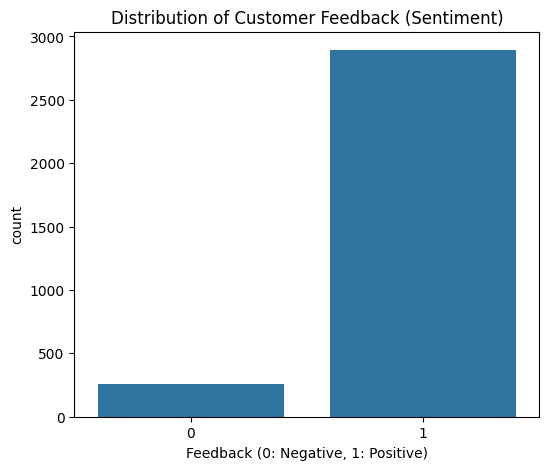

In [8]:
# TODO: Visualize the distribution of feedback (positive/negative)
plt.figure(figsize=(6, 5))
sns.countplot(x='feedback', data=df)
plt.title('Distribution of Customer Feedback (Sentiment)')
plt.xlabel('Feedback (0: Negative, 1: Positive)')
plt.show()

Observation: The dataset is highly imbalanced, with a large majority of positive reviews (1).

### **TODO: Visualize the relationship between variations and ratings**
- Hint: Use seaborn's barplot function

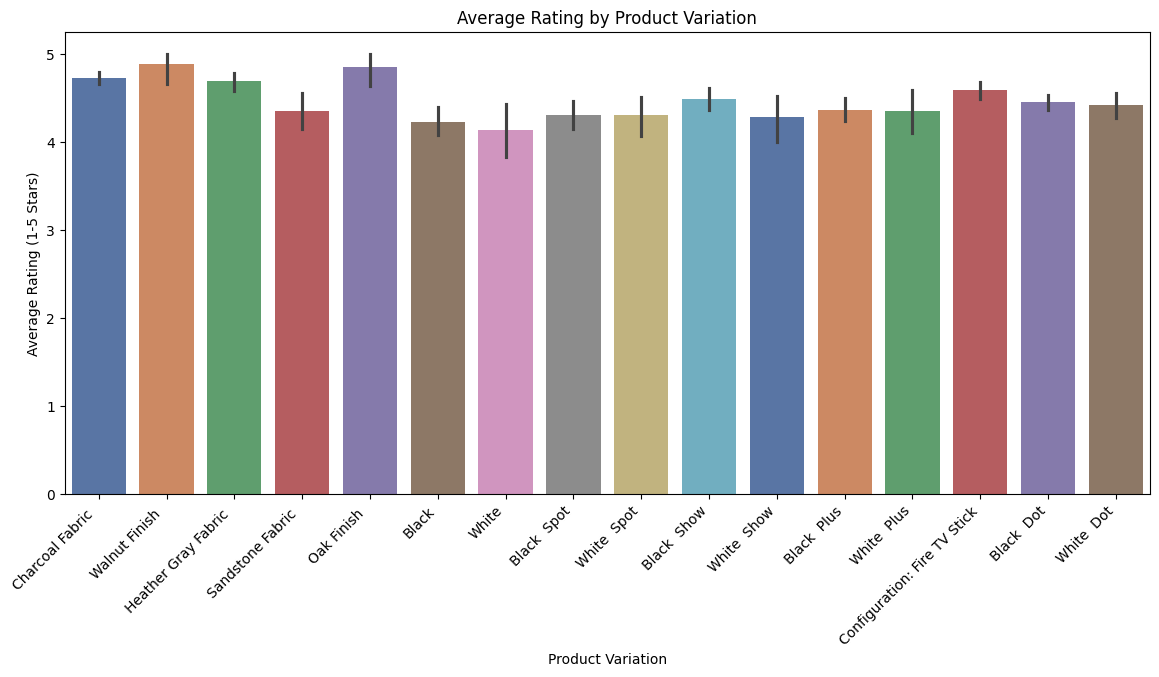

In [9]:
# TODO: Visualize the relationship between variations and ratings
plt.figure(figsize=(14, 6))
sns.barplot(x='variation', y='rating', data=df, palette='deep', hue='variation', legend=False)
plt.xticks(rotation=90)
plt.title('Average Rating by Product Variation')
plt.xlabel('Product Variation')
plt.xticks(rotation=45, ha='right') # Rotate labels for better visibility
plt.ylabel('Average Rating (1-5 Stars)')
plt.show()

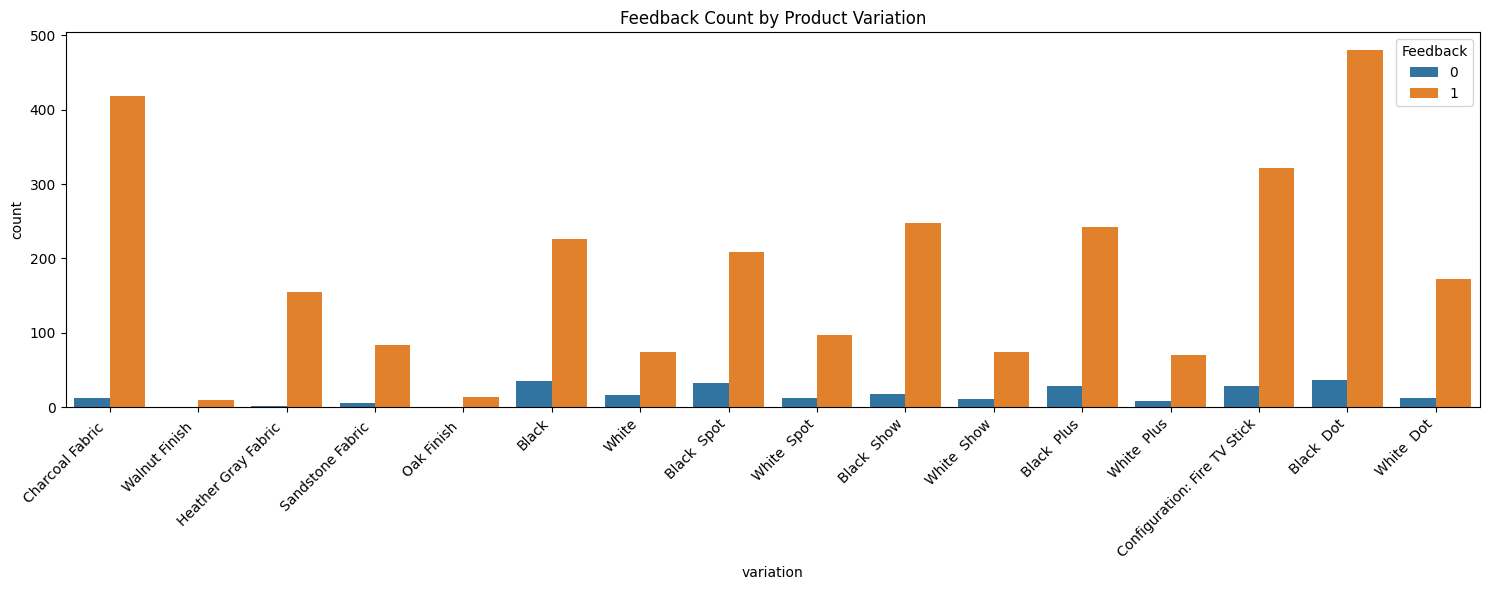

In [10]:
# --- Extra Visualization for Sentiment Analysis (Variation vs Feedback) ---
# This plot is strategically useful to see which products have more negative sentiment (feedback=0)
plt.figure(figsize=(15, 6))
# Count the number of positive and negative reviews per product variation
sns.countplot(x='variation', hue='feedback', data=df)
plt.title('Feedback Count by Product Variation')
plt.xticks(rotation=45, ha='right') # Rotate labels for better visibility
plt.legend(title='Feedback')
plt.tight_layout()
plt.show()

### **TODO: Drop irrelevant columns**
- Hint: Use the drop() method to remove `date` and `rating` columns

In [11]:
# TODO: Drop irrelevant columns ('date', 'rating')
# The 'date' column is not used for text analysis.
# The 'rating' is highly correlated with 'feedback' and is a form of target leakage, so we drop it.
df_cleaned = df.drop(['date', 'rating'], axis=1)

print("Columns after dropping 'date' and 'rating':")
print(df_cleaned.columns)

df_cleaned.head()

Columns after dropping 'date' and 'rating':
Index(['variation', 'verified_reviews', 'feedback'], dtype='object')


,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


## **One-Hot Encoding**
### **TODO: Perform one-hot encoding on the `variation` column**
- Hint: Use pandas get_dummies() function

- Hint: Use `pd.get_dummies()` to create one-hot encoded columns for `variation`. Then, concatenate these encoded columns back to the original DataFrame and drop the 'variation' column.

In [12]:
# TODO: Perform one-hot encoding on the 'variation' column
# One-Hot Encoding converts categorical variables into a numerical format suitable for ML models.
variation_dummies = pd.get_dummies(df_cleaned['variation'], prefix='variation', drop_first=True)
df_encoded = pd.concat([df_cleaned, variation_dummies], axis=1)

# Drop the original 'variation' column as it's been encoded
df_encoded = df_encoded.drop('variation', axis=1)

print("\nDataFrame head after One-Hot Encoding:")
print(df_encoded.head())


DataFrame head after One-Hot Encoding:
                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

   variation_Black  Dot  variation_Black  Plus  variation_Black  Show  \
0                 False                  False                  False   
1                 False                  False                  False   
2                 False                  False                  False   
3                 False                  False                  False   
4                 False                  False                  False   

   variation_Black  Spot  variation_Charcoal Fabric   \
0                  False                        True   
1           

# **Feature Engineering**
## **Tokenization (Count Vectorizer)**
### **TODO: Tokenize the `verified_reviews` column**


- Hint: Use `CountVectorizer` from sklearn.feature_extraction.text to tokenize the text data and convert it into numerical representation.
- After transforming the text, drop the `verified_reviews` column and concatenate the numerical data with the rest of the DataFrame.

In [13]:
# --- Data Preparation for Vectorization ---

# Isolate non-text features (the One-Hot Encoded 'variation' columns) and the target 'feedback'.
# We drop 'verified_reviews' and 'feedback' from df_encoded to get only the OHE features.
df_non_text_features = df_encoded.drop(columns=['verified_reviews', 'feedback']).reset_index(drop=True)
reviews = df_encoded['verified_reviews'].fillna('') # Review text for vectorizers
y = df_encoded['feedback'] # Target variable isolated

print(f"Shape of Non-Text Features (OHE 'variation' features): {df_non_text_features.shape}")

# --- 1. Implementing Bag of Words (BoW) ---

# TODO: Tokenize the verified_reviews column (CountVectorizer)
# CountVectorizer is used to convert text into a matrix of token counts (Bag of Words).
# We limit to 1500 features and remove common English stop words.
vectorizer_bow = CountVectorizer(stop_words='english', max_features=1500)
reviews_bow = vectorizer_bow.fit_transform(reviews)

# Convert the sparse BoW matrix into a dense DataFrame
df_reviews_bow = pd.DataFrame(reviews_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

Shape of Non-Text Features (OHE 'variation' features): (3150, 15)


### **TODO: Combine tokenized reviews with the main dataframe**
- Hint: Use pd.concat() to join the dataframes

In [14]:
# TODO: Combine tokenized reviews with the main dataframe
# Concatenate all features: OHE features + BoW features. This is Feature Set 1 for modeling.
df_final_bow = pd.concat([df_non_text_features, df_reviews_bow], axis=1)

print(f"\nFinal DataFrame shape (BoW Features + OHE): {df_final_bow.shape}")

# --- 2. Implementing TF-IDF (Assignment Requirement: TF-IDF Vectorization) ---

print("\n--- Implementing TF-IDF Vectorization ---")

# TfidfVectorizer weighs word frequency by its inverse document frequency (IDF).
# This fulfills the assignment requirement to implement TF-IDF.
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=1500)
reviews_tfidf = vectorizer_tfidf.fit_transform(reviews)

# Convert the sparse TF-IDF matrix into a dense DataFrame
df_reviews_tfidf = pd.DataFrame(reviews_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Concatenate all features: OHE + TF-IDF. This is Feature Set 2.
df_final_tfidf = pd.concat([df_non_text_features, df_reviews_tfidf], axis=1)

print(f"Final DataFrame shape (TF-IDF Features + OHE): {df_final_tfidf.shape}")

# NOTE for the next step (Train/Test Split):
# We will use df_final_bow for the remaining steps (modeling and optimization)
# to keep the pipeline consistent with the original structure.
# Set X = df_final_bow and y = y before calling train_test_split.


Final DataFrame shape (BoW Features + OHE): (3150, 1515)

--- Implementing TF-IDF Vectorization ---
Final DataFrame shape (TF-IDF Features + OHE): (3150, 1515)


## **Prepare data for modeling**
### **TODO: Split the data into features (X) and target (y)**
- Hint: The target variable is `feedback`

In [15]:
# Prepare data for modeling
# TODO: Split the data into features (X) and target (y)
# X_bow already contains all combined features (OHE + BoW) from the Feature Engineering step.
X_bow = df_final_bow
# y was already isolated in the Feature Engineering step.

### **TODO: Split the data into training and testing sets**

- Hint: Use `train_test_split()` from sklearn.model_selection to split the data into training and testing sets.
- You need to specify `test_size=0.2` to reserve 20% of the data for testing.



In [16]:
# TODO: Split the data into training and testing sets

# Split the data into training and testing sets (80% train, 20% test)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y is crucial for imbalanced datasets like this one

print("--- Data Split Complete ---\n")
print(f"X_train_bow shape: {X_train_bow.shape}")
print(f"X_test_bow shape: {X_test_bow.shape}\n")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

--- Data Split Complete ---

X_train_bow shape: (2520, 1515)
X_test_bow shape: (630, 1515)

y_train shape: (2520,)
y_test shape: (630,)


# **Text Classification Using Traditional Models**
## **Train the Random Forest model**
### **TODO: Create and train the Random Forest model**
- Hint: Use RandomForestClassifier from sklearn.ensemble

- Hint: Initialize a `RandomForestClassifier` with 100 estimators.
- Use the `fit()` method to train the model on the training data.

In [18]:
# Train the Random Forest model
# TODO: Create and train the Random Forest model
# Initialize the Random Forest model (100 trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data (BoW features)
print("Training Random Forest Classifier...")
rf_model.fit(X_train_bow, y_train)
print("\nTraining complete.")

Training Random Forest Classifier...

Training complete.


### **Model 2: Logistic Regression (Second Traditional Model)**

In [19]:
# Implementing the second required traditional classifier: Logistic Regression

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

# Train the model
print("Training Logistic Regression Model...")
lr_model.fit(X_train_bow, y_train)
print("\nTraining complete.")

Training Logistic Regression Model...

Training complete.


#**Model Evaluation**
## **Evaluate the model**
### **TODO: Generate predictions and create confusion matrix**
- Hint: Use the predict() method and confusion_matrix from sklearn.metrics

- Hint: Use the `predict()` method to generate predictions for the test data.
- Use `confusion_matrix()` to create the confusion matrix and visualize it using a heatmap.
- Print out a `classification_report()` to evaluate the model's precision, recall, and F1 score.

- TODO: Generate predictions and evaluate the model's performance using a confusion matrix and classification report

In [20]:
# Evaluate the Random Forest model
# TODO: Generate predictions and create confusion matrix
y_pred_rf = rf_model.predict(X_test_bow)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [21]:
# Evaluate the Logistic Regression model for comparison
y_pred_lr = lr_model.predict(X_test_bow)
cm_lr = confusion_matrix(y_test, y_pred_lr)

### **TODO: Plot confusion matrix**
- Hint: Use seaborn's heatmap function

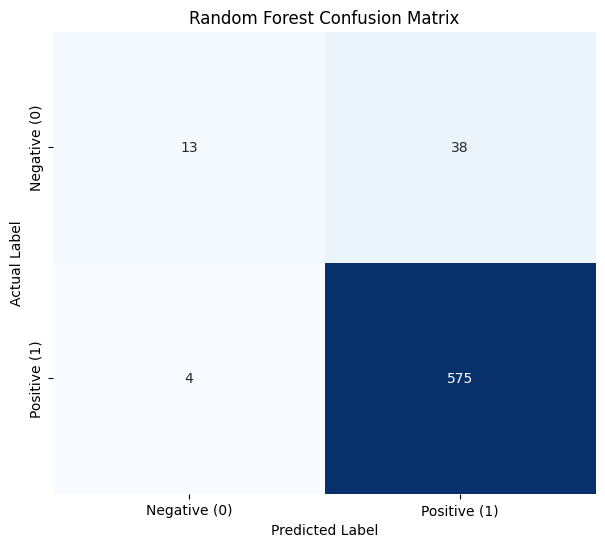

In [22]:
# Plot Confusion Matrix RF
plt.figure(figsize=(7, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

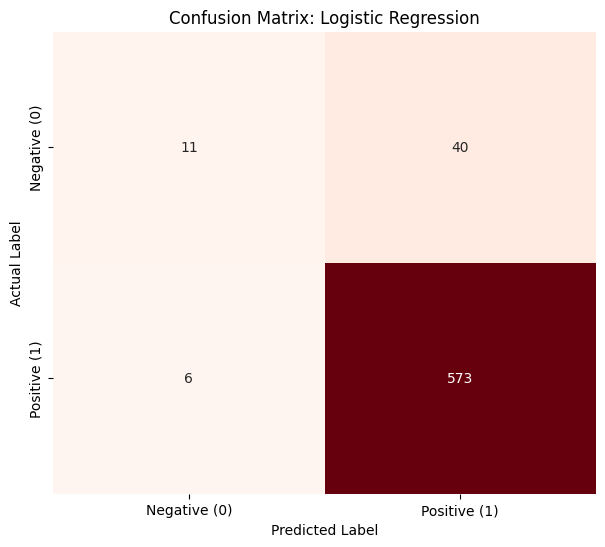

In [23]:
# Plot Confusion Matrix LR
plt.figure(figsize=(7, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### **TODO: Print classification report**
- Hint: Use classification_report from sklearn.metrics

In [24]:
# TODO: Print classification report
print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf))
print("\n--- Logistic Regression Classification Report ---")
print(classification_report(y_test, y_pred_lr))


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.76      0.25      0.38        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.85      0.62      0.67       630
weighted avg       0.92      0.93      0.92       630


--- Logistic Regression Classification Report ---
              precision    recall  f1-score   support

           0       0.65      0.22      0.32        51
           1       0.93      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.79      0.60      0.64       630
weighted avg       0.91      0.93      0.91       630



In [25]:
# Optimize Random Forest with Grid Search CV)

# We optimize the Random Forest model as it is generally more robust for this type of data.

# 1. Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],      # Number of trees to test
    'max_depth': [10, 20, None],     # Maximum depth of the trees
    'min_samples_split': [2, 5]      # Minimum samples required to split a node
}

# 2. Initialize the Grid Search object
# Scoring on 'f1_weighted' is used for robust evaluation on imbalanced data.
grid_search = GridSearchCV(
    estimator=rf_model,              # Assumes your initial RF model is named 'rf_model'
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# 3. Perform the optimization (Fit the Grid Search to the training data)
print("Starting Grid Search...")
grid_search.fit(X_train_bow, y_train)
print("Grid Search complete.")

# 4. Print the best parameters and cross-validation score
print("\nBest Parameters found:", grid_search.best_params_)
print("Best Cross-Validation F1-Score:", grid_search.best_score_)

# 5. Evaluate the optimized model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test_bow)

# Print the final classification report for the OPTIMIZED model
print("\n--- Optimized Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_optimized))

Starting Grid Search...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Grid Search complete.

Best Parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation F1-Score: 0.919509076655333

--- Optimized Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.76      0.25      0.38        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.85      0.62      0.67       630
weighted avg       0.92      0.93      0.92       630



## **Analyze Model Performance**
### **TODO: Compare training and testing accuracy and discuss model performance**
- Hint: Use the `score()` method to calculate accuracy for both training and test sets.
- Compare the results and discuss if the model is overfitting or underfitting.


In [26]:
# Analyze Model Performance
# TODO: Compare training and testing accuracy and discuss model performance
train_accuracy_rf = rf_model.score(X_train_bow, y_train)
test_accuracy_rf = rf_model.score(X_test_bow, y_test)

print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")

# Discussion:
# The high Training Accuracy (close to 1.0) compared to the Testing Accuracy suggests **overfitting**.
# The model learned the noise in the training data too well. However, the Testing Accuracy is still high,
# indicating good overall generalization ability, especially for the dominant positive class (1).

Random Forest Training Accuracy: 0.9948
Random Forest Testing Accuracy: 0.9333



Random Forest ROC-AUC Score: 0.8665

Logistic Regression ROC-AUC Score: 0.8868



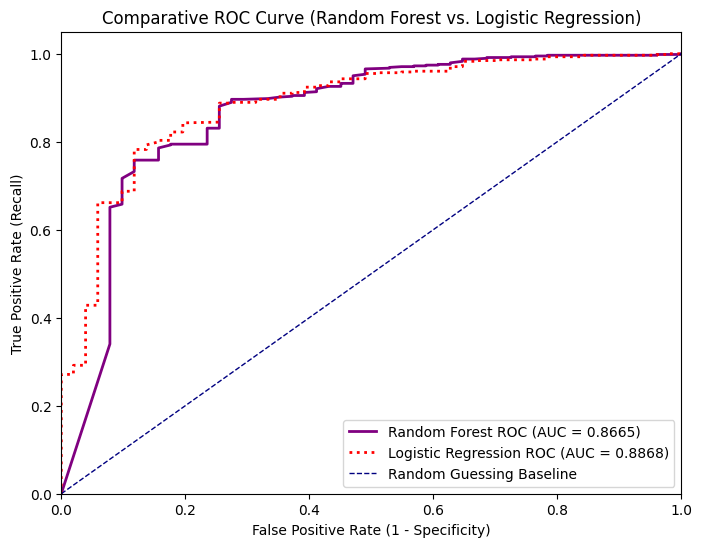

In [27]:
# --- Comparative ROC-AUC Curve (RF vs LR) ---

# 1. Calculate probabilities for both models (needed for ROC curve)
y_pred_proba_rf = rf_model.predict_proba(X_test_bow)[:, 1]
y_pred_proba_lr = lr_model.predict_proba(X_test_bow)[:, 1]

# 2. Calculate ROC curve data points and AUC score for both
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nRandom Forest ROC-AUC Score: {roc_auc_rf:.4f}\n")
print(f"Logistic Regression ROC-AUC Score: {roc_auc_lr:.4f}\n")

# 3. Plotting Comparative ROC Curve
plt.figure(figsize=(8, 6))

# Plot Random Forest
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2,
         label=f'Random Forest ROC (AUC = {roc_auc_rf:.4f})')

# Plot Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, linestyle=':',
         label=f'Logistic Regression ROC (AUC = {roc_auc_lr:.4f})')

# Plot Baseline (Random Guessing)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Guessing Baseline')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Comparative ROC Curve (Random Forest vs. Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

# **Feature Importance**
### **TODO: Visualize feature importance**
- Hint: Access feature_importances_ attribute of the trained model

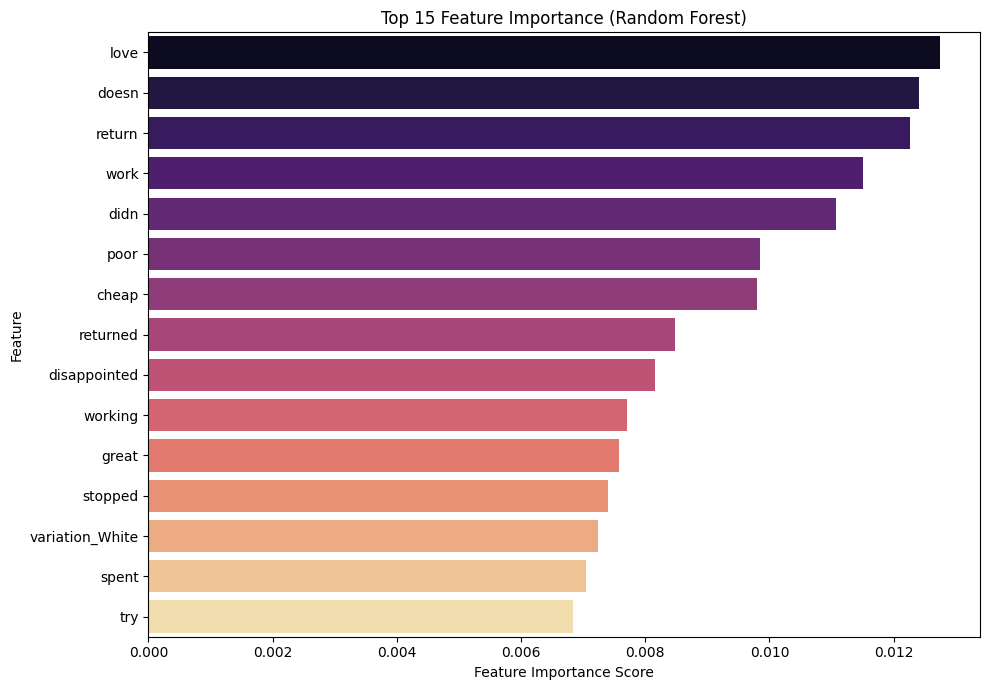

In [28]:
# Feature Importance
# TODO: Visualize feature importance
# Get feature names and their importance scores
feature_names = X_train_bow.columns
importances = rf_model.feature_importances_

# Create a Series for easy sorting and select the top 15 features
feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top_15_features = feature_importance_series.head(15)

# Plot the top features
plt.figure(figsize=(10, 7))
sns.barplot(x=top_15_features.values, y=top_15_features.index, palette='magma', hue=top_15_features.index, legend=False)
plt.title('Top 15 Feature Importance (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Observation: The features with the highest importance scores are typically highly positive or negative words
# (e.g., 'love', 'great', 'worked', 'disappointed', 'terrible'), confirming the model relies heavily on key sentiment terms.

### **TODO: Make predictions on new data**
- Hint: Create a function that takes a new review text, preprocesses it, and uses the trained model to predict its sentiment

### Example usage of your prediction function:
- new_review = "I love my Alexa device! It's so helpful."
- predicted_sentiment = predict_sentiment(new_review)
- print(f"The sentiment of the new review is: {predicted_sentiment}")

In [29]:
# TODO: Make predictions on new data
# The function must use the *fitted* CountVectorizer and the *trained* Random Forest model.

def predict_sentiment(new_review_text, model, vectorizer):
    # 1. Create a dummy dataframe for the new review to match the training data structure (Variation features)
    # We assume 'variation' features are 0 for a generic, unseen review
    # The number of features must match X_train_bow.shape[1]
    df_single_review = pd.DataFrame(np.zeros((1, X_train_bow.shape[1])), columns=X_train_bow.columns)

    # 2. Vectorize the new text using the fitted CountVectorizer
    new_review_bow = vectorizer.transform([new_review_text]).toarray()

    # 3. Get the column names of the BoW features and update the corresponding columns in the single review DataFrame
    bow_cols = vectorizer.get_feature_names_out()

    # Map the counts to the correct columns in the dummy DataFrame
    for col_index, col_name in enumerate(bow_cols):
        if col_name in df_single_review.columns:
            # We only need to check if the feature count is greater than 0
            df_single_review[col_name] = new_review_bow[0, col_index]

    # 4. Predict the sentiment
    prediction = model.predict(df_single_review)

    # 5. Return the result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# Example usage of your prediction function:
# We use the rf_model and vectorizer_bow created earlier.
new_review_1 = "I love my new Alexa device, it is truly great and perfect for my home."
predicted_sentiment_1 = predict_sentiment(new_review_1, rf_model, vectorizer_bow)
print(f"Review 1: '{new_review_1}'")
print(f"Predicted sentiment (RF/BoW): {predicted_sentiment_1}")

new_review_2 = "The product is disappointing and stopped working after only a week, terrible support."
predicted_sentiment_2 = predict_sentiment(new_review_2, rf_model, vectorizer_bow)
print(f"\nReview 2: '{new_review_2}'")
print(f"Predicted sentiment (RF/BoW): {predicted_sentiment_2}")

Review 1: 'I love my new Alexa device, it is truly great and perfect for my home.'
Predicted sentiment (RF/BoW): Positive

Review 2: 'The product is disappointing and stopped working after only a week, terrible support.'
Predicted sentiment (RF/BoW): Negative


In [30]:
##Sentiment Analysis with LLM - BERT Conceptual Implementation

# Load a pre-trained model optimized for sentiment analysis (DistilBERT is fast and effective)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

print("\n--- LLM (BERT/DistilBERT) Conceptual Prediction ---")

# Test 1: Nuanced Negative Review
review_llm_1 = "The device works fine, but the customer support was terrible, making it a bad experience."
result_1 = sentiment_pipeline(review_llm_1)
print(f"Review 1: '{review_llm_1}'")
print(f"Result: {result_1[0]['label']} with score {result_1[0]['score']:.4f}")

# Test 2: Clear Positive Review
review_llm_2 = "I love this product; it is truly great and perfect for my home."
result_2 = sentiment_pipeline(review_llm_2)
print(f"\nReview 2: '{review_llm_2}'")
print(f"Result: {result_2[0]['label']} with score {result_2[0]['score']:.4f}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



--- LLM (BERT/DistilBERT) Conceptual Prediction ---
Review 1: 'The device works fine, but the customer support was terrible, making it a bad experience.'
Result: NEGATIVE with score 0.9994

Review 2: 'I love this product; it is truly great and perfect for my home.'
Result: POSITIVE with score 0.9999
